<a href="https://colab.research.google.com/github/BrainConnection/Small_Project/blob/main/IEC_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install scipy
!pip install numpy
!pip install matplotlib

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [92]:
v = [
    -2.6, -2.55, -2.5, -2.45, -2.4, -2.35, -2.3, -2.25, -2.2, -2.15, -2.1, -2.05, -2.0, -1.95, -1.9, -1.85,
    -1.8, -1.75, -1.7, -1.65, -1.6, -1.55, -1.5, -1.45, -1.4, -1.35, -1.3, -1.25, -1.2, -1.15, -1.1, -1.05,
    -1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25,
    -0.2, -0.15, -0.1, -0.05, -9.575660e-16, 0.04999995, 0.09999979, 0.1499993, 0.1999979, 0.2499938, 0.2999811,
    0.3499431, 0.3998289, 0.4494884, 0.4984934, 0.5457439, 0.5890224, 0.6257302, 0.6549455, 0.6778334, 0.6961337,
    0.7113306, 0.724153, 0.735353, 0.7453533, 0.7544249, 0.7627627, 0.7705095, 0.7777715, 0.7846296, 0.7911468,
    0.7973724, 0.8033463, 0.8091009, 0.8146628, 0.820054, 0.8252932, 0.8303962, 0.8353765, 0.8402455, 0.8450135,
    0.8496892, 0.8542801, 0.8587933, 0.8632345, 0.8676093, 0.8719223, 0.8761778, 0.8803797, 0.8845316, 0.8886365,
    0.8926973, 0.8967167,]

In [93]:
i = [
    -2.522599e-09, -2.522550e-09, -2.522499e-09, -2.522450e-09, -2.522400e-09, -2.522350e-09, -2.522300e-09, -2.522250e-09,
    -2.522200e-09, -2.522150e-09, -2.522100e-09, -2.522050e-09, -2.522000e-09, -2.521950e-09, -2.521900e-09, -2.521850e-09,
    -2.521800e-09, -2.521750e-09, -2.521700e-09, -2.521650e-09, -2.521600e-09, -2.521550e-09, -2.521500e-09, -2.521450e-09,
    -2.521400e-09, -2.521350e-09, -2.521300e-09, -2.521250e-09, -2.521200e-09, -2.521150e-09, -2.521100e-09, -2.521050e-09,
    -2.521000e-09, -2.520950e-09, -2.520900e-09, -2.520850e-09, -2.520800e-09, -2.520750e-09, -2.520699e-09, -2.520648e-09,
    -2.520596e-09, -2.520537e-09, -2.520459e-09, -2.520327e-09, -2.520030e-09, -2.519236e-09, -2.516941e-09, -2.510124e-09,
    -2.489676e-09, -2.428141e-09, -2.242756e-09, -1.684043e-09, -5.315848e-23, 5.076154e-09, 2.037718e-08, 6.649879e-08,
    2.055184e-07, 6.245149e-07, 1.887014e-06, 5.688111e-06, 1.710531e-05, 5.115822e-05, 1.506750e-04, 4.259480e-04,
    1.097759e-03, 2.427002e-03, 4.505521e-03, 7.216727e-03, 1.038665e-02, 1.387595e-02, 1.759018e-02, 2.146732e-02,
    2.546613e-02, 2.955840e-02, 3.372429e-02, 3.794942e-02, 4.222310e-02, 4.653721e-02, 5.088545e-02, 5.526286e-02,
    5.966544e-02, 6.408996e-02, 6.853376e-02, 7.299463e-02, 7.747070e-02, 8.196039e-02, 8.646237e-02, 9.097546e-02, 9.549866e-02, 1.000311e-01,
    1.045720e-01, 1.091207e-01, 1.136766e-01, 1.182391e-01, 1.228078e-01, 1.273822e-01, 1.319620e-01, 1.365469e-01,
    1.411363e-01, 1.457303e-01, 1.503283e-01,
]

In [39]:
v = np.array(v)
i = np.array(i)

In [46]:
len(i)

101

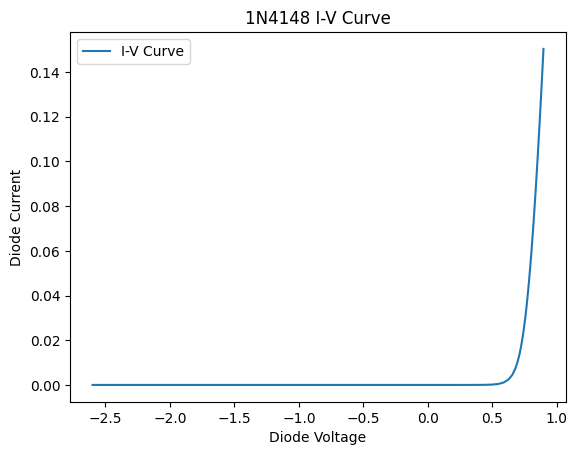

In [40]:
plt.plot(v,i,label="I-V Curve")
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 I-V Curve")
plt.legend()

In [59]:
def func(i, i_s, eta, rs):
  return np.log(i/i_s+1)*eta*0.025887 + rs*i

popt, pcov = curve_fit(func, i, v, p0 = [2.52e-09, 1.752, 0.568])

<ipython-input-59-9fa939965a21>:2: RuntimeWarning: invalid value encountered in log
  return np.log(i/i_s+1)*eta*0.025887 + rs*i
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [60]:
popt

array([2.520e-09, 1.752e+00, 5.680e-01])

In [78]:
def fitted_i(i, v, i_s, eta, rs):
  return i_s*(np.exp((v-rs*i)/(eta*0.025887))-1)


def recursive_fitted_2(i, v, i_s, eta, rs):
  i_1 = fitted_i(i, v, i_s, eta, rs)

  return fitted_i(i_1, v, i_s, eta, rs)


def recursive_fitted_3(i, v, i_s, eta, rs):
  i_1 = fitted_i(i, v, i_s, eta, rs)
  i_2 = fitted_i(i_1, v, i_s, eta, rs)

  return fitted_i(i_2, v, i_s, eta, rs)

Text(0.5, 1.0, '1N4148 I-V Curve')

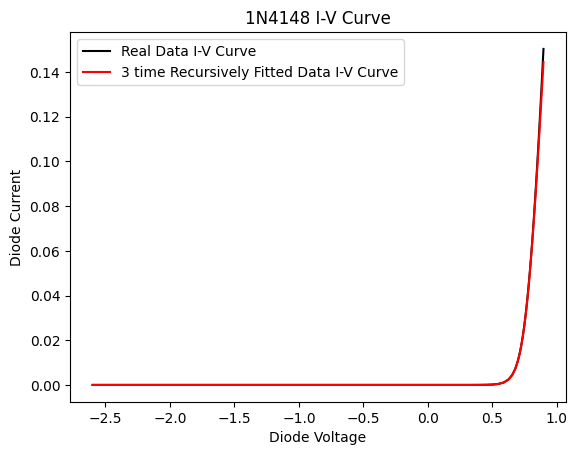

In [88]:
plt.plot(v, i, label="Real Data I-V Curve", color="black")
plt.plot(v, recursive_fitted_3(i, v, 2.520e-09, 1.752e+00, 5.680e-01), label="3 time Recursively Fitted Data I-V Curve", color="red")
plt.legend()
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 I-V Curve")

(0.06, 0.15)

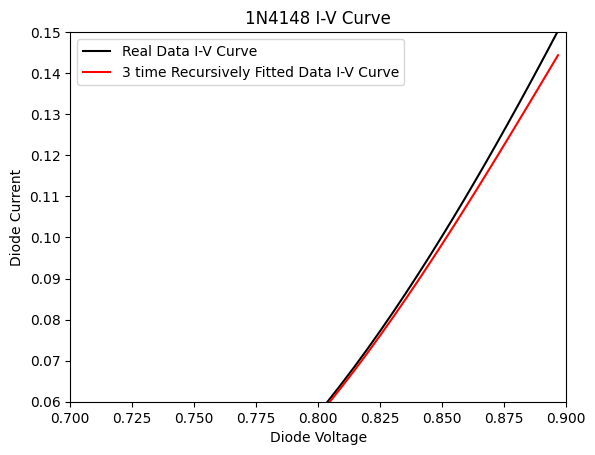

In [89]:
plt.plot(v, i, label="Real Data I-V Curve", color="black")
plt.plot(v, recursive_fitted_3(i, v, 2.520e-09, 1.752e+00, 5.680e-01), label="3 time Recursively Fitted Data I-V Curve", color="red")
plt.legend()
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 I-V Curve")
plt.xlim(0.7,0.9)
plt.ylim(0.06,0.15)

In [74]:
fit_1 = fitted_i(i, v, 2.520e-09, 1.752e+00, 5.680e-01)
fit_2 = recursive_fitted_2(i, v, 2.520e-09, 1.752e+00, 5.680e-01)
fit_3 = recursive_fitted_3(i, v, 2.520e-09, 1.752e+00, 5.680e-01)

In [75]:
sum = 0
for num in range(101):
  sum = sum + (fit_1[num]-i[num])**2

MSE = np.sqrt(sum/101)

MSE

0.0007551037288783788

In [76]:
sum = 0
for num in range(101):
  sum = sum + (fit_2[num]-i[num])**2

MSE = np.sqrt(sum/101)

MSE

0.0004305232813321303

In [87]:
sum = 0
for num in range(101):
  sum = sum + np.abs(fit_3[num]-i[num])/i[num]

MSE = np.sqrt(sum/101)

MSE

0.08186873560537447

In [90]:
v_2 = [
    -2.600000e+00, -2.550000e+00, -2.500000e+00, -2.450000e+00, -2.400000e+00, -2.350000e+00, -2.300000e+00,
    -2.250000e+00, -2.200000e+00, -2.150000e+00, -2.100000e+00, -2.050000e+00, -2.000000e+00, -1.950000e+00,
    -1.900000e+00, -1.850000e+00, -1.800000e+00, -1.750000e+00, -1.700000e+00, -1.650000e+00, -1.600000e+00,
    -1.550000e+00, -1.500000e+00, -1.450000e+00, -1.400000e+00, -1.350000e+00, -1.300000e+00, -1.250000e+00,
    -1.200000e+00, -1.150000e+00, -1.100000e+00, -1.050000e+00, -1.000000e+00, -9.500000e-01, -9.000000e-01,
    -8.500000e-01, -8.000000e-01, -7.500000e-01, -7.000000e-01, -6.500000e-01, -6.000000e-01, -5.500000e-01,
    -5.000000e-01, -4.500000e-01, -4.000000e-01, -3.500000e-01, -3.000000e-01, -2.500000e-01, -2.000000e-01,
    -1.500000e-01, -1.000000e-01, -5.000000e-02, -9.575660e-16, 4.999995e-02, 9.999979e-02, 1.499993e-01,
    1.999979e-01, 2.499938e-01, 2.999811e-01, 3.499431e-01, 3.998289e-01, 4.494884e-01, 4.984934e-01,
    5.457439e-01, 5.890224e-01, 6.257302e-01, 6.549455e-01, 6.778334e-01, 6.961337e-01, 7.113306e-01,
    7.241530e-01, 7.353530e-01, 7.453533e-01, 7.544249e-01, 7.627627e-01, 7.705095e-01, 7.777715e-01,
    7.846296e-01, 7.911468e-01, 7.973724e-01, 8.033463e-01, 8.091009e-01, 8.146628e-01, 8.200540e-01,
    8.252932e-01, 8.303962e-01, 8.353765e-01, 8.402455e-01, 8.450135e-01, 8.496892e-01, 8.542801e-01,
    8.587933e-01, 8.632345e-01, 8.676093e-01, 8.719223e-01, 8.761778e-01, 8.803797e-01, 8.845316e-01,
    8.886365e-01, 8.926973e-01, 8.967167e-01, 9.006971e-01, 9.046406e-01, 9.085492e-01, 9.124248e-01,
    9.162692e-01, 9.200839e-01, 9.238704e-01, 9.276300e-01, 9.313640e-01, 9.350736e-01, 9.387600e-01, 9.424240e-01]

In [91]:
i_2 = [
    -2.522599e-09, -2.522550e-09, -2.522499e-09, -2.522450e-09, -2.522400e-09, -2.522350e-09, -2.522300e-09, -2.522250e-09,
    -2.522200e-09, -2.522150e-09, -2.522100e-09, -2.522050e-09, -2.522000e-09, -2.521950e-09, -2.521900e-09, -2.521850e-09,
    -2.521800e-09, -2.521750e-09, -2.521700e-09, -2.521650e-09, -2.521600e-09, -2.521550e-09, -2.521500e-09, -2.521450e-09,
    -2.521400e-09, -2.521350e-09, -2.521300e-09, -2.521250e-09, -2.521200e-09, -2.521150e-09, -2.521100e-09, -2.521050e-09,
    -2.521000e-09, -2.520950e-09, -2.520900e-09, -2.520850e-09, -2.520800e-09, -2.520750e-09, -2.520699e-09, -2.520648e-09,
    -2.520596e-09, -2.520537e-09, -2.520459e-09, -2.520327e-09, -2.520030e-09, -2.519236e-09, -2.516941e-09, -2.510124e-09,
    -2.489676e-09, -2.428141e-09, -2.242756e-09, -1.684043e-09, -5.315848e-23, 5.076154e-09, 2.037718e-08, 6.649879e-08,
    2.055184e-07, 6.245149e-07, 1.887014e-06, 5.688111e-06, 1.710531e-05, 5.115822e-05, 1.506750e-04, 4.259480e-04,
    1.097759e-03, 2.427002e-03, 4.505521e-03, 7.216727e-03, 1.038665e-02, 1.387595e-02, 1.759018e-02, 2.146732e-02,
    2.546613e-02, 2.955840e-02, 3.372429e-02, 3.794942e-02, 4.222310e-02, 4.653721e-02, 5.088545e-02, 5.526286e-02,
    5.966544e-02, 6.408996e-02, 6.853376e-02, 7.299463e-02, 7.747070e-02, 8.196039e-02, 8.646237e-02, 9.097546e-02,
    9.549866e-02, 1.000311e-01, 1.045720e-01, 1.091207e-01, 1.136766e-01, 1.182391e-01, 1.228078e-01, 1.273822e-01,
    1.319620e-01, 1.365469e-01, 1.411363e-01, 1.457303e-01, 1.503283e-01, 0.1549303, 0.1595359, 0.1641451, 0.1687575,
    0.1733731, 0.1779916, 0.182613, 0.187237, 0.1918636, 0.1964926,
    0.201124, 0.2057576
]

(0.06, 0.15)

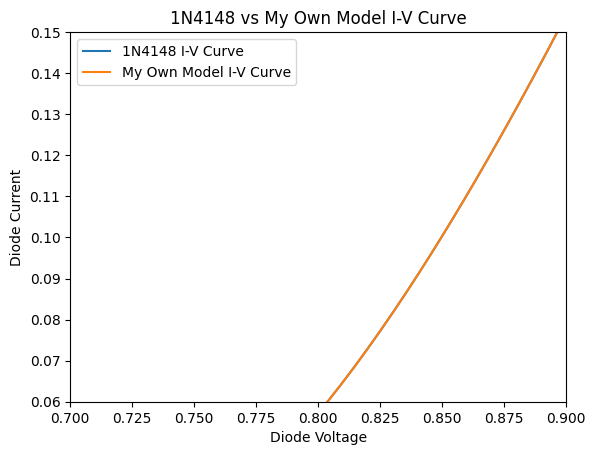

In [96]:
plt.plot(v,i,label="1N4148 I-V Curve")
plt.plot(v_2, i_2, label="My Own Model I-V Curve")
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 vs My Own Model I-V Curve")
plt.legend()

plt.xlim(0.7,0.9)
plt.ylim(0.06,0.15)

In [ ]:
plt.plot(v,i,label="1N4148 I-V Curve")
plt.plot(v_2, i_2, label="My Own Model I-V Curve")
plt.xlabel("Diode Voltage")
plt.ylabel("Diode Current")
plt.title("1N4148 vs My Own Model I-V Curve")
plt.legend()

In [95]:
sum = 0
for num in range(101):
  sum = sum + np.abs(i_2[num]-i[num])/i[num]

MSE = np.sqrt(sum/101)

MSE

0.0

In [1]:
v = [-2.4206, -2.1093, -1.8199, -1.5293, -1.2103, -0.9096, -0.6092, -0.3095, -0.007, 0.0995, 0.1992, 0.2994, 0.4096, 0.599, 0.7128, 0.8176, 0.8950, 0.9114, 0.9213, 0.9321, 0.9384]
v_in = [-2.4207, -2.1094, -1.82, -1.5294, -1.2104, -0.9097, -0.6093, -0.3096, 0, 0.0996, 0.1993, 0.2995, 0.4098, 0.6092, 0.8, 1.2, 1.8, 2.0993, 2.2997, 2.5392, 2.7193]
ohm = 9.94

i_temp = []
for i in range(21):
  i_temp.append((v_in[i]-v[i])/ohm)

i_temp

[-1.006036217305946e-05,
 -1.0060362173014783e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 0.0007042253521126761,
 1.0060362173037122e-05,
 1.0060362173039914e-05,
 1.0060362173037122e-05,
 2.0120724346074244e-05,
 0.001026156941649898,
 0.008772635814889343,
 0.03847082494969819,
 0.09104627766599599,
 0.11950704225352113,
 0.13867203219315896,
 0.1616800804828974,
 0.17916498993963784]

[-1.006036217305946e-05,
 -1.0060362173014783e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 -1.0060362173037122e-05,
 0.0007042253521126761,
 1.0060362173037122e-05,
 1.0060362173039914e-05,
 1.0060362173037122e-05,
 2.0120724346074244e-05,
 0.001026156941649898,
 0.008772635814889343,
 0.03847082494969819,
 0.09104627766599599,
 0.11950704225352113,
 0.13867203219315896,
 0.1616800804828974,
 0.17916498993963784]

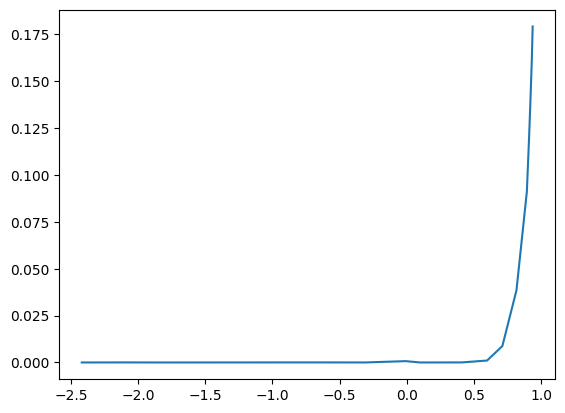

In [100]:
plt.plot(v, i_temp, label="I-V Curve")

In [101]:
def func(i, i_s, eta, rs):
  return np.log(i/i_s+1)*eta*0.025887 + rs*i

popt, pcov = curve_fit(func, i, v, p0 = [2.52e-09, 1.752, 0.568])

<ipython-input-101-9fa939965a21>:2: RuntimeWarning: invalid value encountered in log
  return np.log(i/i_s+1)*eta*0.025887 + rs*i
